## Imports: <a class = "anchor" id = "imports"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

plt.style.use("ggplot")

## Data: <a class = "anchor" id = "data"></a>

In [3]:
df = pd.read_csv("stats.csv",).rename(columns = {" first_name" : "first_name"})
df["first_name"] = df["first_name"].str.strip()
df["full_name"] = df["first_name"] + " " + df["last_name"]
df.insert(0, "full_name", df.pop("full_name"))
df.drop(columns = "Unnamed: 38", inplace = True)
df["slash_line"] = df["batting_avg"].astype(str).map(lambda x: x[1:5]) + "/" +\
                   df["on_base_percent"].astype(str).map(lambda x: x[1:5]) + "/" +\
                   df["slg_percent"].astype(str).map(lambda x: x[1:5]) + "/" +\
                   df["on_base_plus_slg"].astype(str).map(lambda x: x[1:5])

In [4]:
df.head()

,full_name,last_name,first_name,player_id,year,player_age,b_ab,b_total_pa,b_total_hits,b_single,...,xwoba,xobp,xiso,wobacon,xwobacon,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,slash_line
0,Miguel Cabrera,Cabrera,Miguel,408234,2021,38,296,326,73,55,...,0.306,0.291,0.179,0.359,0.373,91.5,10.8,32.4,8.7,.247/.304/.375/.679
1,Nelson Cruz Jr.,Cruz Jr.,Nelson,443558,2021,41,313,366,89,54,...,0.384,0.364,0.250,0.431,0.445,93.6,10.8,32.0,14.4,.284/.361/.534/.894
2,David Peralta,Peralta,David,444482,2021,34,332,370,84,52,...,0.295,0.314,0.106,0.337,0.309,89.2,4.5,27.5,5.5,.253/.327/.401/.728
3,Charlie Blackmon,Blackmon,Charlie,453568,2021,35,324,370,88,64,...,0.352,0.372,0.134,0.337,0.357,87.3,8.4,29.8,5.3,.272/.359/.389/.748
4,Andrew McCutchen,McCutchen,Andrew,457705,2021,35,323,393,77,43,...,0.361,0.368,0.201,0.401,0.410,88.4,12.7,37.5,10.4,.238/.356/.471/.827


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   full_name                137 non-null    object 
 1   last_name                137 non-null    object 
 2   first_name               137 non-null    object 
 3   player_id                137 non-null    int64  
 4   year                     137 non-null    int64  
 5   player_age               137 non-null    int64  
 6   b_ab                     137 non-null    int64  
 7   b_total_pa               137 non-null    int64  
 8   b_total_hits             137 non-null    int64  
 9   b_single                 137 non-null    int64  
 10  b_double                 137 non-null    int64  
 11  b_triple                 137 non-null    int64  
 12  b_home_run               137 non-null    int64  
 13  b_strikeout              137 non-null    int64  
 14  b_walk                   1

## EDA: <a class = "anchor" id = "eda"></a>

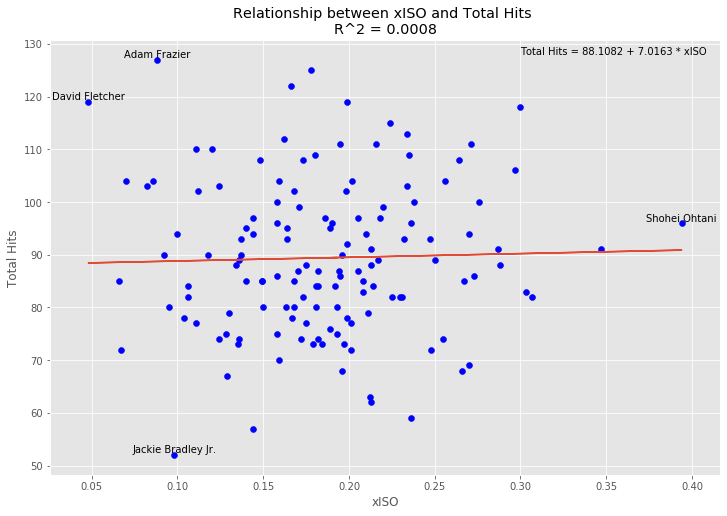

In [15]:
X = df[["xiso"]]
y = df["b_total_hits"]

plt.figure(figsize = (12,8))
plt.scatter(X,y,c = "b")

ols = LinearRegression()
ols.fit(X,y)
plt.plot(X, ols.predict(X))
plt.annotate(f'Total Hits = {round(ols.intercept_, 4)} + {round(ols.coef_[0], 4)} * xISO',
             (.3,128))

plt.title(f'Relationship between xISO and Total Hits \nR^2 = {round(ols.score(X,y), 4)}')
plt.xlabel("xISO")
plt.ylabel("Total Hits")

a = df.loc[df["xiso"] == min(df["xiso"]), ["full_name", "xiso", "b_total_hits"]].reset_index()
plt.annotate(a["full_name"][0],
             (a["xiso"][0], a["b_total_hits"][0]),
             ha = "center",
             va = "bottom")

b = df.loc[df["xiso"] == max(df["xiso"]), ["full_name", "xiso", "b_total_hits"]].reset_index()
plt.annotate(b["full_name"][0],
             (b["xiso"][0], b["b_total_hits"][0]),
             ha = "center",
             va = "bottom")

c = df.loc[df["b_total_hits"] == min(df["b_total_hits"]), ["full_name", "xiso", "b_total_hits"]].reset_index()
plt.annotate(c["full_name"][0],
             (c["xiso"][0], c["b_total_hits"][0]),
             ha = "center",
             va = "bottom")

d = df.loc[df["b_total_hits"] == max(df["b_total_hits"]), ["full_name", "xiso", "b_total_hits"]].reset_index()
plt.annotate(d["full_name"][0],
             (d["xiso"][0], d["b_total_hits"][0]),
             ha = "center",
             va = "bottom");
# plt.savefig("xISO_H.png")

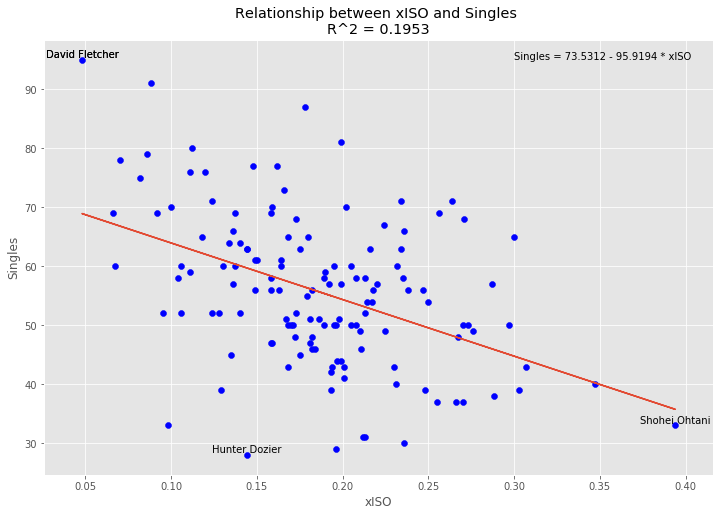

In [14]:
X = df[["xiso"]]
y = df["b_single"]

plt.figure(figsize = (12,8))
plt.scatter(X,y,c = "b")

ols = LinearRegression()
ols.fit(X,y)
plt.plot(X, ols.predict(X))
plt.annotate(f'Singles = {round(ols.intercept_, 4)} - {abs(round(ols.coef_[0], 4))} * xISO',
             (.3,95))

plt.title(f'Relationship between xISO and Singles \nR^2 = {round(ols.score(X,y), 4)}')
plt.xlabel("xISO")
plt.ylabel("Singles")

a = df.loc[df["xiso"] == min(df["xiso"]), ["full_name", "xiso", "b_single"]].reset_index()
plt.annotate(a["full_name"][0],
             (a["xiso"][0], a["b_single"][0]),
             ha = "center",
             va = "bottom")

b = df.loc[df["xiso"] == max(df["xiso"]), ["full_name", "xiso", "b_single"]].reset_index()
plt.annotate(b["full_name"][0],
             (b["xiso"][0], b["b_single"][0]),
             ha = "center",
             va = "bottom")

c = df.loc[df["b_single"] == min(df["b_single"]), ["full_name", "xiso", "b_single"]].reset_index()
plt.annotate(c["full_name"][0],
             (c["xiso"][0], c["b_single"][0]),
             ha = "center",
             va = "bottom")

d = df.loc[df["b_single"] == max(df["b_single"]), ["full_name", "xiso", "b_single"]].reset_index()
plt.annotate(d["full_name"][0],
             (d["xiso"][0], d["b_single"][0]),
             ha = "center",
             va = "bottom");
# plt.savefig("xISO_1B.png")

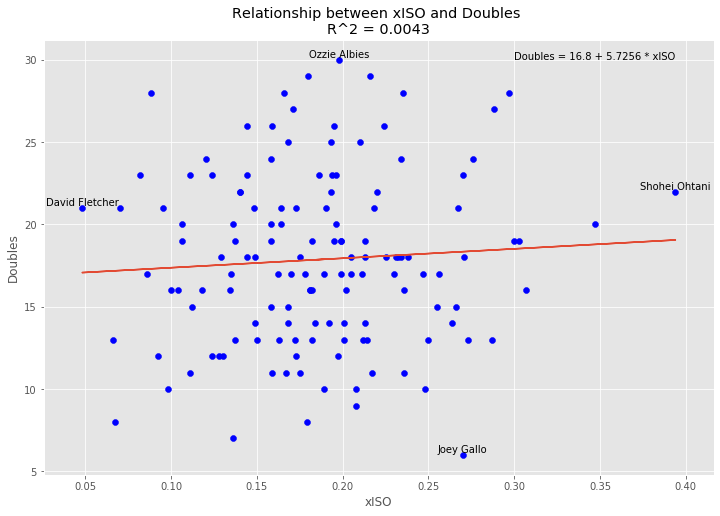

In [13]:
X = df[["xiso"]]
y = df["b_double"]

plt.figure(figsize = (12,8))
plt.scatter(X,y,c = "b")

ols = LinearRegression()
ols.fit(X,y)
plt.plot(X, ols.predict(X))
plt.annotate(f'Doubles = {round(ols.intercept_, 4)} + {round(ols.coef_[0], 4)} * xISO',
             (.3,30))

plt.title(f'Relationship between xISO and Doubles \nR^2 = {round(ols.score(X,y), 4)}')
plt.xlabel("xISO")
plt.ylabel("Doubles")

a = df.loc[df["xiso"] == min(df["xiso"]), ["full_name", "xiso", "b_double"]].reset_index()
plt.annotate(a["full_name"][0],
             (a["xiso"][0], a["b_double"][0]),
             ha = "center",
             va = "bottom")

b = df.loc[df["xiso"] == max(df["xiso"]), ["full_name", "xiso", "b_double"]].reset_index()
plt.annotate(b["full_name"][0],
             (b["xiso"][0], b["b_double"][0]),
             ha = "center",
             va = "bottom")

c = df.loc[df["b_double"] == min(df["b_double"]), ["full_name", "xiso", "b_double"]].reset_index()
plt.annotate(c["full_name"][0],
             (c["xiso"][0], c["b_double"][0]),
             ha = "center",
             va = "bottom")

d = df.loc[df["b_double"] == max(df["b_double"]), ["full_name", "xiso", "b_double"]].reset_index()
plt.annotate(d["full_name"][0],
             (d["xiso"][0], d["b_double"][0]),
             ha = "center",
             va = "bottom");
plt.savefig("xISO_2B.png");

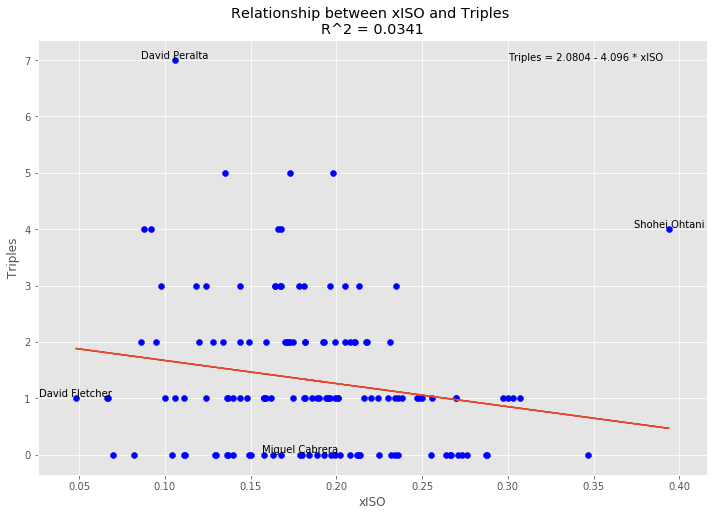

In [12]:
X = df[["xiso"]]
y = df["b_triple"]

plt.figure(figsize = (12,8))
plt.scatter(X,y,c = "b")

ols = LinearRegression()
ols.fit(X,y)
plt.plot(X, ols.predict(X))
plt.annotate(f'Triples = {round(ols.intercept_, 4)} - {abs(round(ols.coef_[0], 4))} * xISO',
             (.3, 7))

plt.title(f'Relationship between xISO and Triples \nR^2 = {round(ols.score(X,y), 4)}')
plt.xlabel("xISO")
plt.ylabel("Triples")

a = df.loc[df["xiso"] == min(df["xiso"]), ["full_name", "xiso", "b_triple"]].reset_index()
plt.annotate(a["full_name"][0],
             (a["xiso"][0], a["b_triple"][0]),
             ha = "center",
             va = "bottom")

b = df.loc[df["xiso"] == max(df["xiso"]), ["full_name", "xiso", "b_triple"]].reset_index()
plt.annotate(b["full_name"][0],
             (b["xiso"][0], b["b_triple"][0]),
             ha = "center",
             va = "bottom")

c = df.loc[df["b_triple"] == min(df["b_triple"]), ["full_name", "xiso", "b_triple"]].reset_index()
plt.annotate(c["full_name"][0],
             (c["xiso"][0], c["b_triple"][0]),
             ha = "center",
             va = "bottom")

d = df.loc[df["b_triple"] == max(df["b_triple"]), ["full_name", "xiso", "b_triple"]].reset_index()
plt.annotate(d["full_name"][0],
             (d["xiso"][0], d["b_triple"][0]),
             ha = "center",
             va = "bottom");
# plt.savefig("xISO_3B.png")

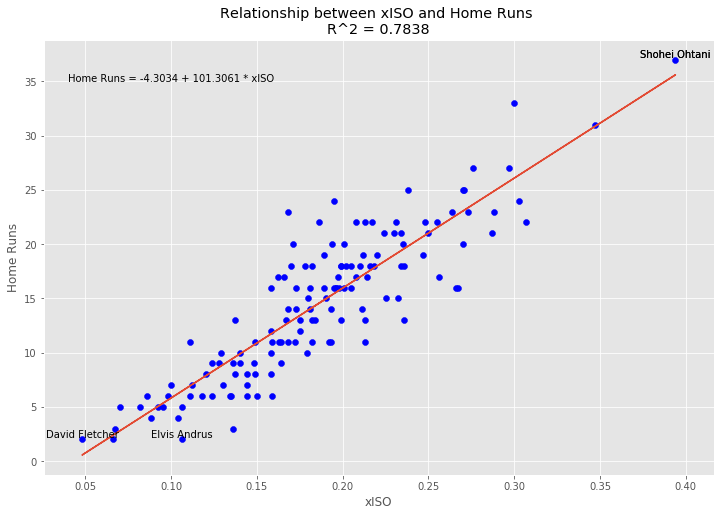

In [11]:
X = df[["xiso"]]
y = df["b_home_run"]

plt.figure(figsize = (12,8))
plt.scatter(X,y,c = "b")

ols = LinearRegression()
ols.fit(X,y)
plt.plot(X, ols.predict(X))
plt.annotate(f'Home Runs = {round(ols.intercept_, 4)} + {round(ols.coef_[0], 4)} * xISO',
             (.04, 35))

plt.title(f'Relationship between xISO and Home Runs \nR^2 = {round(ols.score(X,y), 4)}')
plt.xlabel("xISO")
plt.ylabel("Home Runs")

a = df.loc[df["xiso"] == min(df["xiso"]), ["full_name", "xiso", "b_home_run"]].reset_index()
plt.annotate(a["full_name"][0],
             (a["xiso"][0], a["b_home_run"][0]),
             ha = "center",
             va = "bottom")

b = df.loc[df["xiso"] == max(df["xiso"]), ["full_name", "xiso", "b_home_run"]].reset_index()
plt.annotate(b["full_name"][0],
             (b["xiso"][0], b["b_home_run"][0]),
             ha = "center",
             va = "bottom")

c = df.loc[df["b_home_run"] == min(df["b_home_run"]), ["full_name", "xiso", "b_home_run"]].reset_index()
plt.annotate(c["full_name"][0],
             (c["xiso"][0], c["b_home_run"][0]),
             ha = "center",
             va = "bottom")

d = df.loc[df["b_home_run"] == max(df["b_home_run"]), ["full_name", "xiso", "b_home_run"]].reset_index()
plt.annotate(d["full_name"][0],
             (d["xiso"][0], d["b_home_run"][0]),
             ha = "center",
             va = "bottom");
# plt.savefig("xISO_HR.png")